<a href="https://colab.research.google.com/github/ansar2019/image-captionig/blob/main/diversity_perprelxity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from collections import Counter
from transformers import GPT2LMHeadModel, GPT2Tokenizer
import torch

# ==============================================
# Step 1: Read the .txt file into a dictionary
# ==============================================
def read_txt_file(file_path):
    predictions = {}
    with open(file_path, 'r') as f:
        for line in f:
            line = line.strip()
            if not line:
                continue  # Skip empty lines
            try:
                # Split on the first colon (assuming format: "id: caption")
                img_id, caption = line.split(':', 1)
                img_id = img_id.strip()
                caption = caption.strip()
                predictions[img_id] = caption
            except ValueError:
                print(f"Skipping malformed line: {line}")
    return predictions

# Replace with your file path
file_path = "/content/VITGPT2_captions.txt"
predictions = read_txt_file(file_path)
captions = list(predictions.values())

# ==============================================
# Step 2: Compute Perplexity (Fluency)
# ==============================================
def compute_perplexity(captions):
    model = GPT2LMHeadModel.from_pretrained("gpt2")
    tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
    total_loss = 0
    total_tokens = 0
    for caption in captions:
        inputs = tokenizer(caption, return_tensors="pt", add_special_tokens=False)
        with torch.no_grad():
            outputs = model(**inputs, labels=inputs["input_ids"])
            loss = outputs.loss
        total_loss += loss.item() * inputs["input_ids"].size(1)
        total_tokens += inputs["input_ids"].size(1)
    return torch.exp(torch.tensor(total_loss / total_tokens)).item()

perplexity = compute_perplexity(captions)

# ==============================================
# Step 3: Compute Diversity (Unique 4-grams)
# ==============================================
def compute_diversity(captions, n=4):
    ngrams = []
    for cap in captions:
        words = cap.lower().split()
        for i in range(len(words) - n + 1):
            ngrams.append(tuple(words[i:i+n]))
    unique = len(set(ngrams))
    total = len(ngrams)
    return unique / total if total > 0 else 0

diversity = compute_diversity(captions, n=4)

# ==============================================
# Step 4: Caption Length Analysis
# ==============================================
word_counts = [len(cap.split()) for cap in captions]
mean_words = np.mean(word_counts)
std_words = np.std(word_counts)
min_words = min(word_counts)
max_words = max(word_counts)

# ==============================================
# Results
# ==============================================
print(f"Perplexity: {perplexity:.2f}")
print(f"Diversity (4-grams): {diversity:.2f}")
print(f"Caption Length Stats:")
print(f"  Mean ± Std: {mean_words:.1f} ± {std_words:.1f} words")
print(f"  Min/Max: {min_words} / {max_words} words")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

`loss_type=None` was set in the config but it is unrecognised.Using the default loss: `ForCausalLMLoss`.


Perplexity: 178.82
Diversity (4-grams): 0.57
Caption Length Stats:
  Mean ± Std: 10.1 ± 1.5 words
  Min/Max: 6 / 16 words


In [4]:
import numpy as np
from collections import Counter
from transformers import GPT2LMHeadModel, GPT2Tokenizer
import torch

# ==============================================
# Step 1: Read the .txt file into a dictionary
# ==============================================
def read_txt_file(file_path):
    predictions = {}
    with open(file_path, 'r') as f:
        for line in f:
            line = line.strip()
            if not line:
                continue  # Skip empty lines
            try:
                # Split on the first colon (assuming format: "id: caption")
                img_id, caption = line.split(':', 1)
                img_id = img_id.strip()
                caption = caption.strip()
                predictions[img_id] = caption
            except ValueError:
                print(f"Skipping malformed line: {line}")
    return predictions

# Replace with your file path
file_path = "/content/GIT_captions.txt"
predictions = read_txt_file(file_path)
captions = list(predictions.values())

# ==============================================
# Step 2: Compute Perplexity (Fluency)
# ==============================================
def compute_perplexity(captions):
    # Check if captions list is empty to avoid errors later
    if not captions:
        print("Error: No captions found in the file. Cannot compute perplexity.")
        return float('inf')  # Return infinity to indicate failure

    model = GPT2LMHeadModel.from_pretrained("gpt2")
    tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
    total_loss = 0
    total_tokens = 0
    for caption in captions:
        inputs = tokenizer(caption, return_tensors="pt", add_special_tokens=False)
        # Check if the input_ids tensor is empty
        if inputs["input_ids"].size(1) == 0:
            print(f"Warning: Skipping empty or unrecognized caption: {caption}")
            continue  # Skip to the next caption
        with torch.no_grad():
            outputs = model(**inputs, labels=inputs["input_ids"])
            loss = outputs.loss
        total_loss += loss.item() * inputs["input_ids"].size(1)
        total_tokens += inputs["input_ids"].size(1)
    # Check if total_tokens is still 0 after processing all captions
    if total_tokens == 0:
        print("Error: All captions were empty or unrecognized. Cannot compute perplexity.")
        return float('inf')  # Return infinity to indicate failure
    return torch.exp(torch.tensor(total_loss / total_tokens)).item()

perplexity = compute_perplexity(captions)

# ==============================================
# Step 3: Compute Diversity (Unique 4-grams)
# ==============================================
def compute_diversity(captions, n=4):
    # Check if captions list is empty to avoid errors later
    if not captions:
        print("Error: No captions found in the file. Cannot compute diversity.")
        return 0  # Return 0 to indicate failure

    ngrams = []
    for cap in captions:
        words = cap.lower().split()
        for i in range(len(words) - n + 1):
            ngrams.append(tuple(words[i:i+n]))
    unique = len(set(ngrams))
    total = len(ngrams)
    return unique / total if total > 0 else 0

diversity = compute_diversity(captions, n=4)

# ==============================================
# Step 4: Caption Length Analysis
# ==============================================
word_counts = [len(cap.split()) for cap in captions]

# Check if word_counts is empty to avoid errors
if not word_counts:
    print("Error: No captions found in the file. Cannot compute caption length statistics.")
    mean_words = std_words = min_words = max_words = float('nan')  # Set to NaN to indicate failure
else:
    mean_words = np.mean(word_counts)
    std_words = np.std(word_counts)
    min_words = min(word_counts)
    max_words = max(word_counts)

# ==============================================
# Results
# ==============================================
print(f"Perplexity: {perplexity:.2f}")
print(f"Diversity (4-grams): {diversity:.2f}")
print(f"Caption Length Stats:")
print(f"  Mean ± Std: {mean_words:.1f} ± {std_words:.1f} words")
print(f"  Min/Max: {min_words} / {max_words} words")

Skipping malformed line: 001 a man standing at a podium giving a speech.
Skipping malformed line: 002 a group of young boys sitting in a classroom.
Skipping malformed line: 003 a woman sitting at a table with two women sitting at a table.
Skipping malformed line: 004 a baby in a high chair eating carrots and a fork.
Skipping malformed line: 005 a man and woman sitting on a couch with a laptop.
Skipping malformed line: 006 a group of people walking with umbrellas in the rain.
Skipping malformed line: 007 a man and two women sitting at a table.
Skipping malformed line: 008 a little girl holding a stuffed animal next to a table.
Skipping malformed line: 009 a man walking up stairs to a plane.
Skipping malformed line: 010 a woman holding a cell phone to her ear.
Skipping malformed line: 011 a group of women walking down a street holding umbrellas.
Skipping malformed line: 012 a young boy sitting at a desk with a laptop.
Skipping malformed line: 013 a group of young girls playing a game of 

In [5]:
import numpy as np
from collections import Counter
from transformers import GPT2LMHeadModel, GPT2Tokenizer
import torch

# ==============================================
# Step 1: Read the .txt file into a dictionary
# ==============================================
def read_txt_file(file_path):
    predictions = {}
    with open(file_path, 'r') as f:
        for line in f:
            line = line.strip()
            if not line:
                continue  # Skip empty lines
            try:
                # Split on the first colon (assuming format: "id: caption")
                img_id, caption = line.split(':', 1)
                img_id = img_id.strip()
                caption = caption.strip()
                predictions[img_id] = caption
            except ValueError:
                print(f"Skipping malformed line: {line}")
    return predictions

# Replace with your file path
file_path = "/content/BLIP2_captions.txt"
predictions = read_txt_file(file_path)
captions = list(predictions.values())

# ==============================================
# Step 2: Compute Perplexity (Fluency)
# ==============================================
def compute_perplexity(captions):
    model = GPT2LMHeadModel.from_pretrained("gpt2")
    tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
    total_loss = 0
    total_tokens = 0
    for caption in captions:
        inputs = tokenizer(caption, return_tensors="pt", add_special_tokens=False)
        with torch.no_grad():
            outputs = model(**inputs, labels=inputs["input_ids"])
            loss = outputs.loss
        total_loss += loss.item() * inputs["input_ids"].size(1)
        total_tokens += inputs["input_ids"].size(1)
    return torch.exp(torch.tensor(total_loss / total_tokens)).item()

perplexity = compute_perplexity(captions)

# ==============================================
# Step 3: Compute Diversity (Unique 4-grams)
# ==============================================
def compute_diversity(captions, n=4):
    ngrams = []
    for cap in captions:
        words = cap.lower().split()
        for i in range(len(words) - n + 1):
            ngrams.append(tuple(words[i:i+n]))
    unique = len(set(ngrams))
    total = len(ngrams)
    return unique / total if total > 0 else 0

diversity = compute_diversity(captions, n=4)

# ==============================================
# Step 4: Caption Length Analysis
# ==============================================
word_counts = [len(cap.split()) for cap in captions]
mean_words = np.mean(word_counts)
std_words = np.std(word_counts)
min_words = min(word_counts)
max_words = max(word_counts)

# ==============================================
# Results
# ==============================================
print(f"Perplexity: {perplexity:.2f}")
print(f"Diversity (4-grams): {diversity:.2f}")
print(f"Caption Length Stats:")
print(f"  Mean ± Std: {mean_words:.1f} ± {std_words:.1f} words")
print(f"  Min/Max: {min_words} / {max_words} words")

Perplexity: 177.09
Diversity (4-grams): 0.70
Caption Length Stats:
  Mean ± Std: 7.5 ± 1.9 words
  Min/Max: 3 / 15 words


In [6]:
import numpy as np
from collections import Counter
from transformers import GPT2LMHeadModel, GPT2Tokenizer
import torch

# ==============================================
# Step 1: Read the .txt file into a dictionary
# ==============================================
def read_txt_file(file_path):
    predictions = {}
    with open(file_path, 'r') as f:
        for line in f:
            line = line.strip()
            if not line:
                continue  # Skip empty lines
            try:
                # Split on the first colon (assuming format: "id: caption")
                img_id, caption = line.split(':', 1)
                img_id = img_id.strip()
                caption = caption.strip()
                predictions[img_id] = caption
            except ValueError:
                print(f"Skipping malformed line: {line}")
    return predictions

# Replace with your file path
file_path = "/content/Fuyu_8B_captions.txt"
predictions = read_txt_file(file_path)
captions = list(predictions.values())

# ==============================================
# Step 2: Compute Perplexity (Fluency)
# ==============================================
def compute_perplexity(captions):
    model = GPT2LMHeadModel.from_pretrained("gpt2")
    tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
    total_loss = 0
    total_tokens = 0
    for caption in captions:
        inputs = tokenizer(caption, return_tensors="pt", add_special_tokens=False)
        with torch.no_grad():
            outputs = model(**inputs, labels=inputs["input_ids"])
            loss = outputs.loss
        total_loss += loss.item() * inputs["input_ids"].size(1)
        total_tokens += inputs["input_ids"].size(1)
    return torch.exp(torch.tensor(total_loss / total_tokens)).item()

perplexity = compute_perplexity(captions)

# ==============================================
# Step 3: Compute Diversity (Unique 4-grams)
# ==============================================
def compute_diversity(captions, n=4):
    ngrams = []
    for cap in captions:
        words = cap.lower().split()
        for i in range(len(words) - n + 1):
            ngrams.append(tuple(words[i:i+n]))
    unique = len(set(ngrams))
    total = len(ngrams)
    return unique / total if total > 0 else 0

diversity = compute_diversity(captions, n=4)

# ==============================================
# Step 4: Caption Length Analysis
# ==============================================
word_counts = [len(cap.split()) for cap in captions]
mean_words = np.mean(word_counts)
std_words = np.std(word_counts)
min_words = min(word_counts)
max_words = max(word_counts)

# ==============================================
# Results
# ==============================================
print(f"Perplexity: {perplexity:.2f}")
print(f"Diversity (4-grams): {diversity:.2f}")
print(f"Caption Length Stats:")
print(f"  Mean ± Std: {mean_words:.1f} ± {std_words:.1f} words")
print(f"  Min/Max: {min_words} / {max_words} words")

Perplexity: 26.00
Diversity (4-grams): 0.70
Caption Length Stats:
  Mean ± Std: 42.6 ± 18.8 words
  Min/Max: 9 / 84 words


In [7]:
import numpy as np
from collections import Counter
from transformers import GPT2LMHeadModel, GPT2Tokenizer
import torch

# ==============================================
# Step 1: Read the .txt file into a dictionary
# ==============================================
def read_txt_file(file_path):
    predictions = {}
    with open(file_path, 'r') as f:
        for line in f:
            line = line.strip()
            if not line:
                continue  # Skip empty lines
            try:
                # Split on the first colon (assuming format: "id: caption")
                img_id, caption = line.split(':', 1)
                img_id = img_id.strip()
                caption = caption.strip()
                predictions[img_id] = caption
            except ValueError:
                print(f"Skipping malformed line: {line}")
    return predictions

# Replace with your file path
file_path = "/content/LLaVA_captions.txt"
predictions = read_txt_file(file_path)
captions = list(predictions.values())

# ==============================================
# Step 2: Compute Perplexity (Fluency)
# ==============================================
def compute_perplexity(captions):
    model = GPT2LMHeadModel.from_pretrained("gpt2")
    tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
    total_loss = 0
    total_tokens = 0
    for caption in captions:
        inputs = tokenizer(caption, return_tensors="pt", add_special_tokens=False)
        with torch.no_grad():
            outputs = model(**inputs, labels=inputs["input_ids"])
            loss = outputs.loss
        total_loss += loss.item() * inputs["input_ids"].size(1)
        total_tokens += inputs["input_ids"].size(1)
    return torch.exp(torch.tensor(total_loss / total_tokens)).item()

perplexity = compute_perplexity(captions)

# ==============================================
# Step 3: Compute Diversity (Unique 4-grams)
# ==============================================
def compute_diversity(captions, n=4):
    ngrams = []
    for cap in captions:
        words = cap.lower().split()
        for i in range(len(words) - n + 1):
            ngrams.append(tuple(words[i:i+n]))
    unique = len(set(ngrams))
    total = len(ngrams)
    return unique / total if total > 0 else 0

diversity = compute_diversity(captions, n=4)

# ==============================================
# Step 4: Caption Length Analysis
# ==============================================
word_counts = [len(cap.split()) for cap in captions]
mean_words = np.mean(word_counts)
std_words = np.std(word_counts)
min_words = min(word_counts)
max_words = max(word_counts)

# ==============================================
# Results
# ==============================================
print(f"Perplexity: {perplexity:.2f}")
print(f"Diversity (4-grams): {diversity:.2f}")
print(f"Caption Length Stats:")
print(f"  Mean ± Std: {mean_words:.1f} ± {std_words:.1f} words")
print(f"  Min/Max: {min_words} / {max_words} words")

Perplexity: 15.86
Diversity (4-grams): 0.63
Caption Length Stats:
  Mean ± Std: 81.2 ± 20.9 words
  Min/Max: 37 / 153 words


In [8]:
import numpy as np
from collections import Counter
from transformers import GPT2LMHeadModel, GPT2Tokenizer
import torch

# ==============================================
# Step 1: Read the .txt file into a dictionary
# ==============================================
def read_txt_file(file_path):
    predictions = {}
    with open(file_path, 'r') as f:
        for line in f:
            line = line.strip()
            if not line:
                continue  # Skip empty lines
            try:
                # Split on the first colon (assuming format: "id: caption")
                img_id, caption = line.split(':', 1)
                img_id = img_id.strip()
                caption = caption.strip()
                predictions[img_id] = caption
            except ValueError:
                print(f"Skipping malformed line: {line}")
    return predictions

# Replace with your file path
file_path = "/content/OFA_captions.txt"
predictions = read_txt_file(file_path)
captions = list(predictions.values())

# ==============================================
# Step 2: Compute Perplexity (Fluency)
# ==============================================
def compute_perplexity(captions):
    model = GPT2LMHeadModel.from_pretrained("gpt2")
    tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
    total_loss = 0
    total_tokens = 0
    for caption in captions:
        inputs = tokenizer(caption, return_tensors="pt", add_special_tokens=False)
        with torch.no_grad():
            outputs = model(**inputs, labels=inputs["input_ids"])
            loss = outputs.loss
        total_loss += loss.item() * inputs["input_ids"].size(1)
        total_tokens += inputs["input_ids"].size(1)
    return torch.exp(torch.tensor(total_loss / total_tokens)).item()

perplexity = compute_perplexity(captions)

# ==============================================
# Step 3: Compute Diversity (Unique 4-grams)
# ==============================================
def compute_diversity(captions, n=4):
    ngrams = []
    for cap in captions:
        words = cap.lower().split()
        for i in range(len(words) - n + 1):
            ngrams.append(tuple(words[i:i+n]))
    unique = len(set(ngrams))
    total = len(ngrams)
    return unique / total if total > 0 else 0

diversity = compute_diversity(captions, n=4)

# ==============================================
# Step 4: Caption Length Analysis
# ==============================================
word_counts = [len(cap.split()) for cap in captions]
mean_words = np.mean(word_counts)
std_words = np.std(word_counts)
min_words = min(word_counts)
max_words = max(word_counts)

# ==============================================
# Results
# ==============================================
print(f"Perplexity: {perplexity:.2f}")
print(f"Diversity (4-grams): {diversity:.2f}")
print(f"Caption Length Stats:")
print(f"  Mean ± Std: {mean_words:.1f} ± {std_words:.1f} words")
print(f"  Min/Max: {min_words} / {max_words} words")

Perplexity: 128.99
Diversity (4-grams): 0.66
Caption Length Stats:
  Mean ± Std: 9.8 ± 1.3 words
  Min/Max: 6 / 16 words


In [9]:
import numpy as np
from collections import Counter
from transformers import GPT2LMHeadModel, GPT2Tokenizer
import torch

# ==============================================
# Step 1: Read the .txt file into a dictionary
# ==============================================
def read_txt_file(file_path):
    predictions = {}
    with open(file_path, 'r') as f:
        for line in f:
            line = line.strip()
            if not line:
                continue  # Skip empty lines
            try:
                # Split on the first colon (assuming format: "id: caption")
                img_id, caption = line.split(':', 1)
                img_id = img_id.strip()
                caption = caption.strip()
                predictions[img_id] = caption
            except ValueError:
                print(f"Skipping malformed line: {line}")
    return predictions

# Replace with your file path
file_path = "/content/kosmos-2_captions.txt"
predictions = read_txt_file(file_path)
captions = list(predictions.values())

# ==============================================
# Step 2: Compute Perplexity (Fluency)
# ==============================================
def compute_perplexity(captions):
    model = GPT2LMHeadModel.from_pretrained("gpt2")
    tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
    total_loss = 0
    total_tokens = 0
    for caption in captions:
        inputs = tokenizer(caption, return_tensors="pt", add_special_tokens=False)
        with torch.no_grad():
            outputs = model(**inputs, labels=inputs["input_ids"])
            loss = outputs.loss
        total_loss += loss.item() * inputs["input_ids"].size(1)
        total_tokens += inputs["input_ids"].size(1)
    return torch.exp(torch.tensor(total_loss / total_tokens)).item()

perplexity = compute_perplexity(captions)

# ==============================================
# Step 3: Compute Diversity (Unique 4-grams)
# ==============================================
def compute_diversity(captions, n=4):
    ngrams = []
    for cap in captions:
        words = cap.lower().split()
        for i in range(len(words) - n + 1):
            ngrams.append(tuple(words[i:i+n]))
    unique = len(set(ngrams))
    total = len(ngrams)
    return unique / total if total > 0 else 0

diversity = compute_diversity(captions, n=4)

# ==============================================
# Step 4: Caption Length Analysis
# ==============================================
word_counts = [len(cap.split()) for cap in captions]
mean_words = np.mean(word_counts)
std_words = np.std(word_counts)
min_words = min(word_counts)
max_words = max(word_counts)

# ==============================================
# Results
# ==============================================
print(f"Perplexity: {perplexity:.2f}")
print(f"Diversity (4-grams): {diversity:.2f}")
print(f"Caption Length Stats:")
print(f"  Mean ± Std: {mean_words:.1f} ± {std_words:.1f} words")
print(f"  Min/Max: {min_words} / {max_words} words")

Perplexity: 61.44
Diversity (4-grams): 0.63
Caption Length Stats:
  Mean ± Std: 11.4 ± 3.2 words
  Min/Max: 5 / 28 words


In [10]:
import numpy as np
from collections import Counter
from transformers import GPT2LMHeadModel, GPT2Tokenizer
import torch

# ==============================================
# Step 1: Read the .txt file into a dictionary
# ==============================================
def read_txt_file(file_path):
    predictions = {}
    with open(file_path, 'r') as f:
        for line in f:
            line = line.strip()
            if not line:
                continue  # Skip empty lines
            try:
                # Split on the first colon (assuming format: "id: caption")
                img_id, caption = line.split(':', 1)
                img_id = img_id.strip()
                caption = caption.strip()
                predictions[img_id] = caption
            except ValueError:
                print(f"Skipping malformed line: {line}")
    return predictions

# Replace with your file path
file_path = "/content/moondream2_captions.txt"
predictions = read_txt_file(file_path)
captions = list(predictions.values())

# ==============================================
# Step 2: Compute Perplexity (Fluency)
# ==============================================
def compute_perplexity(captions):
    model = GPT2LMHeadModel.from_pretrained("gpt2")
    tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
    total_loss = 0
    total_tokens = 0
    for caption in captions:
        inputs = tokenizer(caption, return_tensors="pt", add_special_tokens=False)
        with torch.no_grad():
            outputs = model(**inputs, labels=inputs["input_ids"])
            loss = outputs.loss
        total_loss += loss.item() * inputs["input_ids"].size(1)
        total_tokens += inputs["input_ids"].size(1)
    return torch.exp(torch.tensor(total_loss / total_tokens)).item()

perplexity = compute_perplexity(captions)

# ==============================================
# Step 3: Compute Diversity (Unique 4-grams)
# ==============================================
def compute_diversity(captions, n=4):
    ngrams = []
    for cap in captions:
        words = cap.lower().split()
        for i in range(len(words) - n + 1):
            ngrams.append(tuple(words[i:i+n]))
    unique = len(set(ngrams))
    total = len(ngrams)
    return unique / total if total > 0 else 0

diversity = compute_diversity(captions, n=4)

# ==============================================
# Step 4: Caption Length Analysis
# ==============================================
word_counts = [len(cap.split()) for cap in captions]
mean_words = np.mean(word_counts)
std_words = np.std(word_counts)
min_words = min(word_counts)
max_words = max(word_counts)

# ==============================================
# Results
# ==============================================
print(f"Perplexity: {perplexity:.2f}")
print(f"Diversity (4-grams): {diversity:.2f}")
print(f"Caption Length Stats:")
print(f"  Mean ± Std: {mean_words:.1f} ± {std_words:.1f} words")
print(f"  Min/Max: {min_words} / {max_words} words")

Perplexity: 39.34
Diversity (4-grams): 0.79
Caption Length Stats:
  Mean ± Std: 26.8 ± 4.1 words
  Min/Max: 16 / 43 words


In [12]:
import numpy as np
from collections import Counter
from transformers import GPT2LMHeadModel, GPT2Tokenizer
import torch

# ==============================================
# Step 1: Read the .txt file into a dictionary
# ==============================================
def read_txt_file(file_path):
    predictions = {}
    with open(file_path, 'r') as f:
        for line in f:
            line = line.strip()
            if not line:
                continue  # Skip empty lines
            try:
                # Split on the first colon (assuming format: "id: caption")
                img_id, caption = line.split(':', 1)
                img_id = img_id.strip()
                caption = caption.strip()
                predictions[img_id] = caption
            except ValueError:
                print(f"Skipping malformed line: {line}")
    return predictions

# Replace with your file path
file_path = "/content/GITcaptions2.txt"
predictions = read_txt_file(file_path)
captions = list(predictions.values())

# ==============================================
# Step 2: Compute Perplexity (Fluency)
# ==============================================
def compute_perplexity(captions):
    model = GPT2LMHeadModel.from_pretrained("gpt2")
    tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
    total_loss = 0
    total_tokens = 0
    for caption in captions:
        inputs = tokenizer(caption, return_tensors="pt", add_special_tokens=False)
        with torch.no_grad():
            outputs = model(**inputs, labels=inputs["input_ids"])
            loss = outputs.loss
        total_loss += loss.item() * inputs["input_ids"].size(1)
        total_tokens += inputs["input_ids"].size(1)
    return torch.exp(torch.tensor(total_loss / total_tokens)).item()

perplexity = compute_perplexity(captions)

# ==============================================
# Step 3: Compute Diversity (Unique 4-grams)
# ==============================================
def compute_diversity(captions, n=4):
    ngrams = []
    for cap in captions:
        words = cap.lower().split()
        for i in range(len(words) - n + 1):
            ngrams.append(tuple(words[i:i+n]))
    unique = len(set(ngrams))
    total = len(ngrams)
    return unique / total if total > 0 else 0

diversity = compute_diversity(captions, n=4)

# ==============================================
# Step 4: Caption Length Analysis
# ==============================================
word_counts = [len(cap.split()) for cap in captions]
mean_words = np.mean(word_counts)
std_words = np.std(word_counts)
min_words = min(word_counts)
max_words = max(word_counts)

# ==============================================
# Results
# ==============================================
print(f"Perplexity: {perplexity:.2f}")
print(f"Diversity (4-grams): {diversity:.2f}")
print(f"Caption Length Stats:")
print(f"  Mean ± Std: {mean_words:.1f} ± {std_words:.1f} words")
print(f"  Min/Max: {min_words} / {max_words} words")

Perplexity: 51.86
Diversity (4-grams): 0.68
Caption Length Stats:
  Mean ± Std: 9.4 ± 1.6 words
  Min/Max: 4 / 17 words


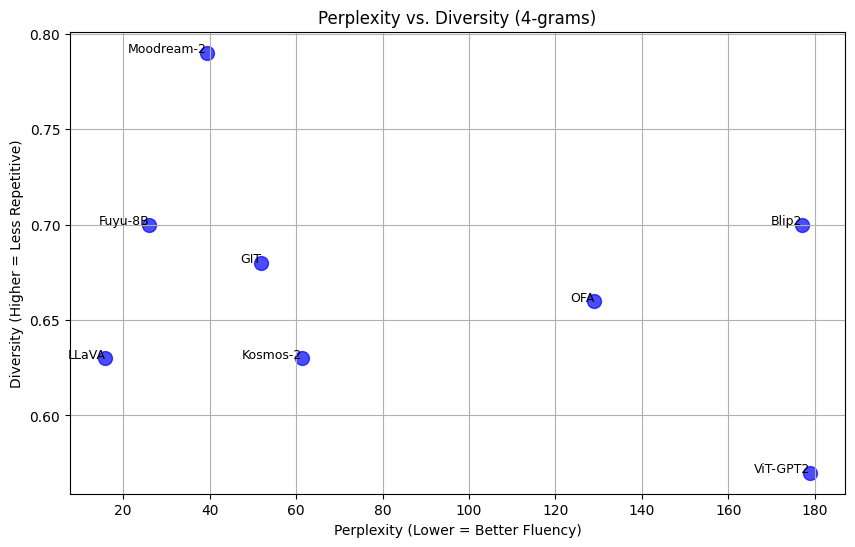

In [13]:
import matplotlib.pyplot as plt

models = ["ViT-GPT2", "Blip2", "Fuyu-8B", "LLaVA", "OFA", "Kosmos-2", "Moodream-2", "GIT"]
perplexity = [178.82, 177.09, 26.00, 15.86, 128.99, 61.44, 39.34, 51.86]
diversity = [0.57, 0.70, 0.70, 0.63, 0.66, 0.63, 0.79, 0.68]

plt.figure(figsize=(10, 6))
plt.scatter(perplexity, diversity, s=100, c='blue', alpha=0.7)
plt.title("Perplexity vs. Diversity (4-grams)")
plt.xlabel("Perplexity (Lower = Better Fluency)")
plt.ylabel("Diversity (Higher = Less Repetitive)")
plt.grid(True)

# Annotate model names
for i, txt in enumerate(models):
    plt.annotate(txt, (perplexity[i], diversity[i]), fontsize=9, ha='right')

plt.show()

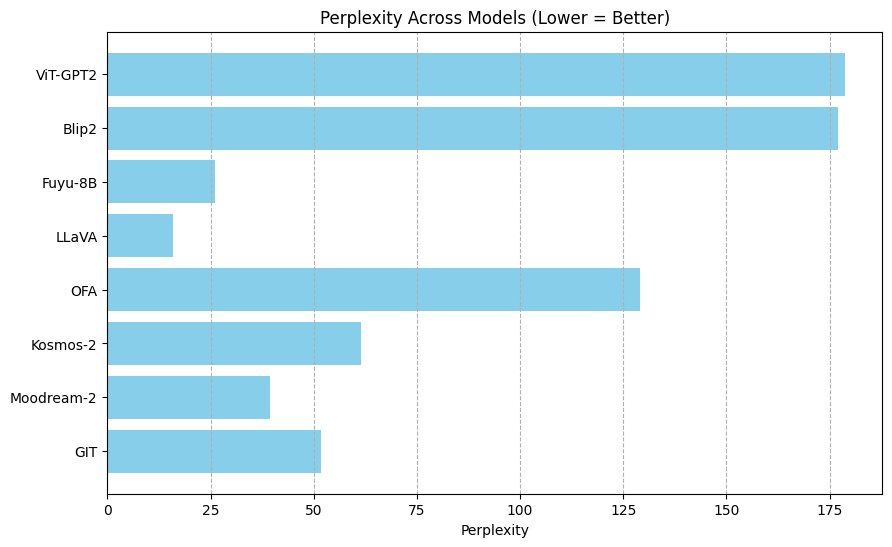

In [14]:
plt.figure(figsize=(10, 6))
plt.barh(models, perplexity, color='skyblue')
plt.title("Perplexity Across Models (Lower = Better)")
plt.xlabel("Perplexity")
plt.gca().invert_yaxis()  # Highest perplexity at the top
plt.grid(axis='x', linestyle='--')
plt.show()

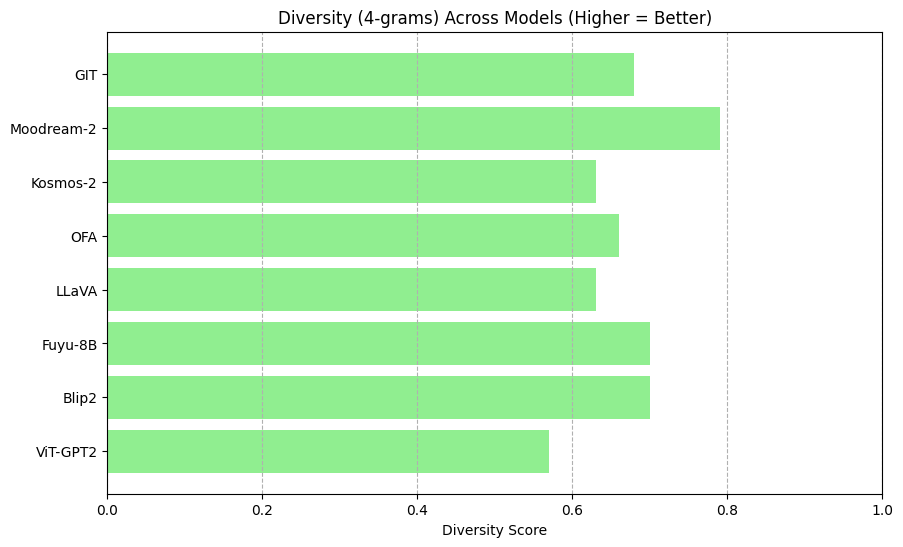

In [15]:
plt.figure(figsize=(10, 6))
plt.barh(models, diversity, color='lightgreen')
plt.title("Diversity (4-grams) Across Models (Higher = Better)")
plt.xlabel("Diversity Score")
plt.xlim(0, 1.0)
plt.grid(axis='x', linestyle='--')
plt.show()

<ipython-input-16-4020c2a3799f>:20: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, vert=False, labels=models)


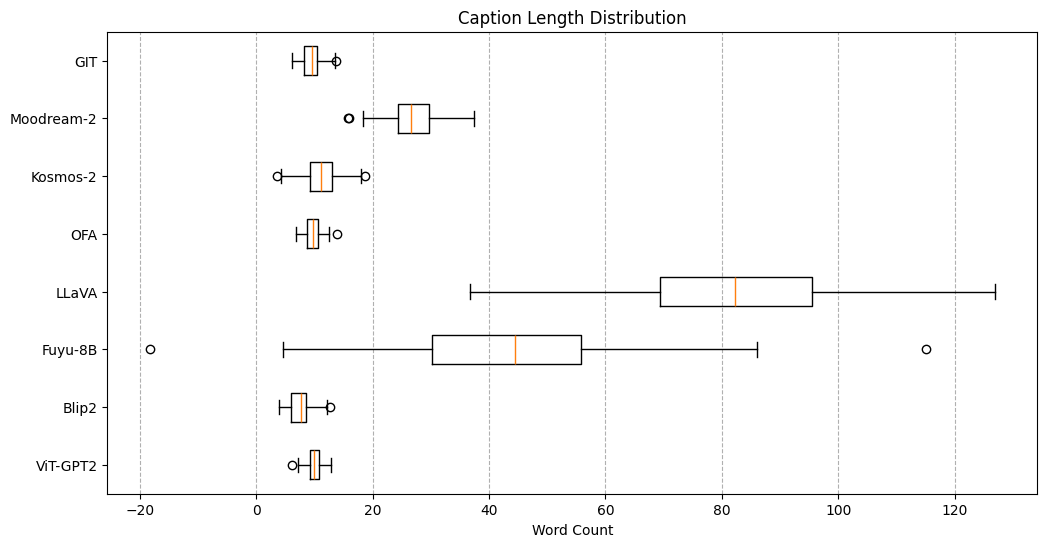

In [16]:
word_counts = [
    [10.1, 1.5],   # ViT-GPT2
    [7.5, 1.9],     # Blip2
    [42.6, 18.8],   # Fuyu-8B
    [81.2, 20.9],   # LLaVA
    [9.8, 1.3],     # OFA
    [11.4, 3.2],    # Kosmos-2
    [26.8, 4.1],    # Moodream-2
    [9.4, 1.6]      # GIT
]

# Simulate data for box plots (mean ± std)
import numpy as np
np.random.seed(42)
data = []
for mean, std in word_counts:
    data.append(np.random.normal(mean, std, 100))  # Generate 100 samples per model

plt.figure(figsize=(12, 6))
plt.boxplot(data, vert=False, labels=models)
plt.title("Caption Length Distribution")
plt.xlabel("Word Count")
plt.grid(axis='x', linestyle='--')
plt.show()